# Class defs BEGINNER

Esta tabla contiene la información de las definiciones de clases.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'classdef__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('classdefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-29 11:11:03.073251 Data cache files found ...
2024-05-29 11:11:03.079777 Data cache files successfully loaded!!
The dataset contains 7755 (34.74%) instances for BEGINNER class and 14569 (65.26%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'classdefs'
TABLE_FEATURES = ['classdef__name_convention', 'classdef__is_enum_class', 'classdef__number_of_characters', 'classdef__number_of_decorators', 'classdef__number_of_methods', 'classdef__number_of_base_classes', 'classdef__has_generic_type_annotations', 'classdef__has_doc_string', 'classdef__body_count', 'classdef__assignments_pct', 'classdef__expressions_pct', 'classdef__uses_meta_class', 'classdef__number_of_keywords', 'classdef__height', 'classdef__average_stmts_method_body', 'classdef__type_annotations_pct', 'classdef__private_methods_pct', 'classdef__magic_methods_pct', 'classdef__async_methods_pct', 'classdef__class_methods_pct', 'classdef__static_methods_pct', 'classdef__abstract_methods_pct', 'classdef__property_methods_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

 BEGINNER CLASS Features shape: (7755, 23)
As we can see the downloaded data contains a total of 7755 instances. For each instance we have 23 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7755 entries, 0 to 7831
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   classdef__name_convention               7755 non-null   object 
 1   classdef__is_enum_class                 7755 non-null   bool   
 2   classdef__number_of_characters          7755 non-null   int64  
 3   classdef__number_of_decorators          7755 non-null   int64  
 4   classdef__number_of_methods             7755 non-null   int64  
 5   classdef__number_of_base_classes        7755 non-null   int64  
 6   classdef__has_generic_type_annotations  7755 non-null   bool   
 7   classdef__has_doc_string                7755 non-null   bool   
 8   classdef__body_count                    7755 non-null   int64  
 9   classdef__assignments_pct               7755 non-null   float64
 10  classdef__expressions_pct               7755 non-null   float64
 

Cómo podemos ver la tabla está compuesta por 18 variables numéricas, 4 variables boleanas y 1 de tipo objeto. 

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [83.91%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

classdef__name_convention                 0
classdef__is_enum_class                   0
classdef__number_of_characters            0
classdef__number_of_decorators            0
classdef__number_of_methods               0
classdef__number_of_base_classes          0
classdef__has_generic_type_annotations    0
classdef__has_doc_string                  0
classdef__body_count                      0
classdef__assignments_pct                 0
classdef__expressions_pct                 0
classdef__uses_meta_class                 0
classdef__number_of_keywords              0
classdef__height                          0
classdef__average_stmts_method_body       0
classdef__type_annotations_pct            0
classdef__private_methods_pct             0
classdef__magic_methods_pct               0
classdef__async_methods_pct               0
classdef__class_methods_pct               0
classdef__static_methods_pct              0
classdef__abstract_methods_pct            0
classdef__property_methods_pct  

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos.

In [6]:
print_empty_cols(X)

classdef__name_convention
-------------------------
0 instancias no tienen un valor para la columna classdef__name_convention


classdef__is_enum_class
-----------------------
0 instancias no tienen un valor para la columna classdef__is_enum_class


classdef__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_characters


classdef__number_of_decorators
------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_decorators


classdef__number_of_methods
---------------------------
0 instancias no tienen un valor para la columna classdef__number_of_methods


classdef__number_of_base_classes
--------------------------------
0 instancias no tienen un valor para la columna classdef__number_of_base_classes


classdef__has_generic_type_annotations
--------------------------------------
0 instancias no tienen un valor para la columna classdef__has_generic_type_annotations


classdef__has_

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
classdef__name_convention,7755,5,CamelUp,6448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__is_enum_class,7755,1,False,7755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__number_of_characters,7755.0,NaN,NaN,NaN,13.18285,5.826402,1.0,9.0,12.0,17.0,35.0
classdef__number_of_decorators,7755.0,NaN,NaN,NaN,0.001161,0.034049,0.0,0.0,0.0,0.0,1.0
classdef__number_of_methods,7755.0,NaN,NaN,NaN,4.599097,7.104099,0.0,1.0,2.0,6.0,73.0
classdef__number_of_base_classes,7755.0,NaN,NaN,NaN,0.899807,0.42082,0.0,1.0,1.0,1.0,4.0
classdef__has_generic_type_annotations,7755,1,False,7755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__has_doc_string,7755,2,True,4753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classdef__body_count,7755.0,NaN,NaN,NaN,6.444745,8.58841,1.0,2.0,3.0,8.0,74.0
classdef__assignments_pct,7755.0,NaN,NaN,NaN,0.123121,0.243682,0.0,0.0,0.0,0.142857,1.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "classdef__number_of_characters": [(0.0, 9.0), (9.0, 13.0), (13.0, 18.0), (18.0, inf)], # min: 1 ; max: 52
    "classdef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 5
    "classdef__number_of_methods": [(0.0, 1.0), (1.0, 2.0), (2.0, 5.0), (5.0, inf)], # min: 0 ; max: 231
    "classdef__number_of_base_classes": [(0.0, 0.0), (1.0, 1.0), (1.0, inf)], # min: 0 ; max: 45
    "classdef__body_count": [(0.0, 2.0), (2.0, 3.0), (3.0, 7.0), (7.0, inf)], # min: 1 ; max: 618
    "classdef__assignments_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__expressions_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__number_of_keywords": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 2.0
    "classdef__height": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 1.0 ; max: 8.0
    "classdef__average_stmts_method_body": [(0.0, 1.0), (1.0, 2.2), (2.2, 4.0), (4.0, inf)], # min: 0.0 ; max: 114.0
    "classdef__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__private_methods_pct": [(0.0, 0.0), (0.0, 0.25), (0.25, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__magic_methods_pct": [(0.0, 0.0), (0.0, 0.50), (0.5, 1.0), (0.1, inf)], # min: 0.0 ; max: 1.0
    "classdef__async_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__class_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__static_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__abstract_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
    "classdef__property_methods_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 ; max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['classdef__number_of_characters'], 10))
print(get_statistics(X_copy, ['classdef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['classdef__number_of_methods'], 10))
print(get_statistics(X_copy, ['classdef__number_of_base_classes'], 10))
print(get_statistics(X_copy, ['classdef__body_count'], 10))
print(get_statistics(X_copy, ['classdef__assignments_pct'], 10))
print(get_statistics(X_copy, ['classdef__expressions_pct'], 10))
print(get_statistics(X_copy, ['classdef__number_of_keywords'], 10))
print(get_statistics(X_copy, ['classdef__height'], 10))
print(get_statistics(X_copy, ['classdef__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['classdef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['classdef__private_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__magic_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__async_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__class_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__static_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__abstract_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__property_methods_pct'], 10))
print(get_statistics(X_copy, ['classdef__name_convention'], 10))
print(get_statistics(X_copy, ['classdef__is_enum_class'], 10))
print(get_statistics(X_copy, ['classdef__has_generic_type_annotations'], 10))
print(get_statistics(X_copy, ['classdef__has_doc_string'], 10))
print(get_statistics(X_copy, ['classdef__uses_meta_class'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['classdef__assignments_pct', 'classdef__expressions_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
classdef__number_of_characters  count  percentage
                    [9.0_13.0)   2274   29.323017
                   [13.0_18.0)   1999   25.776918
                    [18.0_inf]   1784   23.004513
                     [0.0_9.0)   1698   21.895551

classdef__number_of_decorators  count  percentage
                     [0.0_0.0]   7746   99.883946
                     [0.0_inf]      9    0.116054

classdef__number_of_methods  count  percentage
                  [5.0_inf]   2388   30.793037
                  [2.0_5.0)   2374   30.612508
                  [0.0_1.0)   1834   23.649259
                  [1.0_2.0)   1159   14.945197

classdef__number_of_base_classes  count  percentage
                       [1.0_1.0]   6388   82.372663
                       [0.0_0.0]   1084   13.978079
                       [1.0_inf]    283    3.649259

classdef__body_count  count  percentage
           [3.0_7.0)   2471   31.863314
           [7.0_inf]   2361   30.444874
          

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (7755, 27)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

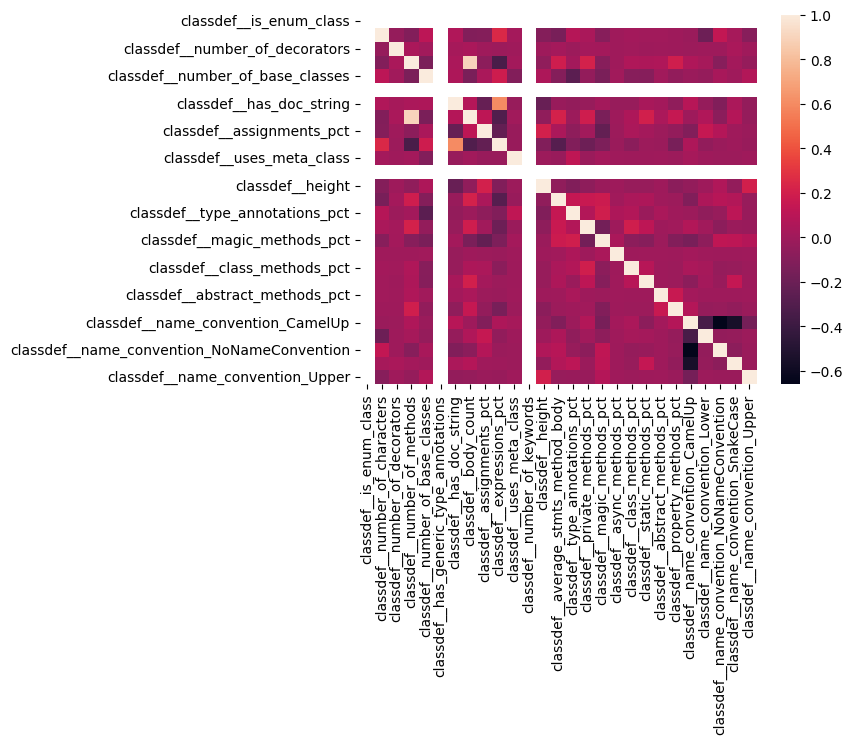

In [10]:
sns.heatmap(X.corr(), annot=False)

### IMPORTANTE
TODO

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 23 variables (8 numericas, 10 procentuales, 4 booleanas y 1 categorica)

### Variable is_enum_class (1/23)
Esta variable es de tipo booleano y representa si la clase hereda de la clase Enum.

<Axes: xlabel='classdef__is_enum_class', ylabel='Count'>

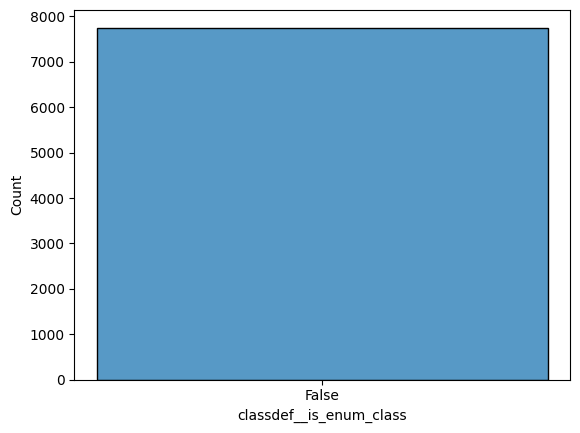

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__is_enum_class'], discrete=True)

In [12]:
num_true_values = len(X[X['classdef__is_enum_class'] == True])
num_false_values = len(X[X['classdef__is_enum_class'] == False])
std = X['classdef__is_enum_class'].std()
freq_true = len(X[X['classdef__is_enum_class'] == True]) / len(X['classdef__is_enum_class'])
freq_false = len(X[X['classdef__is_enum_class'] == False]) / len(X['classdef__is_enum_class'])
print(f'La variable is_enum_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_enum_class a False es {freq_false}.')

La variable is_enum_class contiene 0 valores verdaderos y 7755 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable is_enum_class a True es 0.0.
La frecuencia con la que programa puede tener la variable is_enum_class a False es 1.0.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__is_enum_class', possible_values)

La variable classdef__is_enum_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__is_enum_class toma el valor de 0.0 en un 100.0% de los items.
La variable classdef__is_enum_class toma el valor de True en un 0.0% de los items. [OUTLIER]


In [14]:
X[X['classdef__is_enum_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna definicion de clase que sea Enum

### Variable has_generic_type_annotations (2/23)
Esta variable es de tipo booleano y representa si la clase define un tipo genérico

<Axes: xlabel='classdef__has_generic_type_annotations', ylabel='Count'>

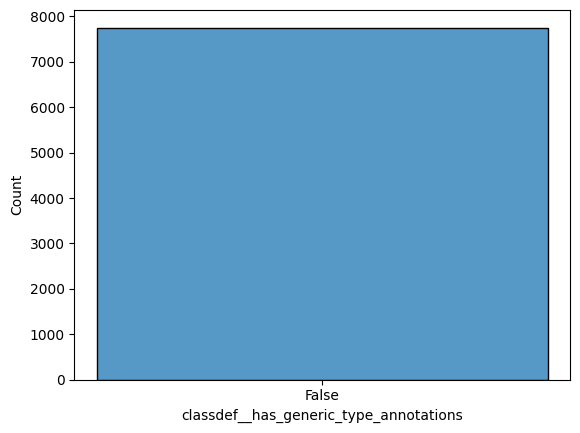

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_generic_type_annotations'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_generic_type_annotations'] == True])
num_false_values = len(X[X['classdef__has_generic_type_annotations'] == False])
std = X['classdef__has_generic_type_annotations'].std()
freq_true = len(X[X['classdef__has_generic_type_annotations'] == True]) / len(X['classdef__has_generic_type_annotations'])
freq_false = len(X[X['classdef__has_generic_type_annotations'] == False]) / len(X['classdef__has_generic_type_annotations'])
print(f'La variable has_generic_type_annotations contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es {freq_false}.')

La variable has_generic_type_annotations contiene 0 valores verdaderos y 7755 valores falsos. Y, la desviación típica es de 0.0
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a True es 0.0.
La frecuencia con la que programa puede tener la variable has_generic_type_annotations a False es 1.0.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_generic_type_annotations', possible_values)

La variable classdef__has_generic_type_annotations contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_generic_type_annotations toma el valor de 0.0 en un 100.0% de los items.
La variable classdef__has_generic_type_annotations toma el valor de True en un 0.0% de los items. [OUTLIER]


In [18]:
X[X['classdef__has_generic_type_annotations'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna definicion de clase que tenga anotaciones de tipo genérico.
Esta propiedad es de python 3.12.

### Variable has_doc_string (3/23)
Esta variable es booleana y representa si el primer elemento del cuerpo de la clase es un doc_string. String planos usados como comentarios.

<Axes: xlabel='classdef__has_doc_string', ylabel='Count'>

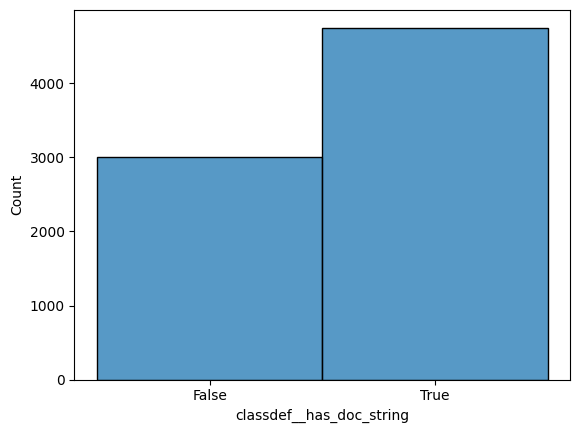

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__has_doc_string'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__has_doc_string'] == True])
num_false_values = len(X[X['classdef__has_doc_string'] == False])
std = X['classdef__has_doc_string'].std()
freq_true = len(X[X['classdef__has_doc_string'] == True]) / len(X['classdef__has_doc_string'])
freq_false = len(X[X['classdef__has_doc_string'] == False]) / len(X['classdef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 4753 valores verdaderos y 3002 valores falsos. Y, la desviación típica es de 0.4871194362640381
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.6128949065119278.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.3871050934880722.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__has_doc_string', possible_values)

La variable classdef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__has_doc_string toma el valor de 1.0 en un 61.29% de los items.
La variable classdef__has_doc_string toma el valor de 0.0 en un 38.71% de los items.


In [22]:
X[X['classdef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,4753.0,4753.000000,4753.000000,4753.000000,4753.000000,4753.0,4753.0,4753.000000,4753.000000,4753.000000,...,4753.0,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000,4753.000000
mean,0.0,13.486429,0.001894,4.850831,0.917105,0.0,1.0,6.973701,0.080631,0.366437,...,0.0,0.014171,0.014588,0.000473,0.032232,0.857353,0.019356,0.054913,0.065853,0.002525
std,0.0,5.993462,0.043478,8.104344,0.399742,0.0,0.0,9.779123,0.166554,0.300333,...,0.0,0.085834,0.094730,0.014589,0.131355,0.349749,0.137788,0.227834,0.248051,0.050188
min,0.0,2.000000,0.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,0.013514,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,9.000000,0.000000,0.000000,1.000000,0.0,1.0,2.000000,0.000000,0.142857,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,13.000000,0.000000,2.000000,1.000000,0.0,1.0,3.000000,0.000000,0.333333,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,17.000000,0.000000,6.000000,1.000000,0.0,1.0,8.000000,0.081081,0.500000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,35.000000,1.000000,73.000000,3.000000,0.0,1.0,74.000000,0.985915,1.000000,...,0.0,1.000000,1.000000,0.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable uses_meta_class (4/23)
Esta variable es booleana y representa si la clase usa una metaclass.

<Axes: xlabel='classdef__uses_meta_class', ylabel='Count'>

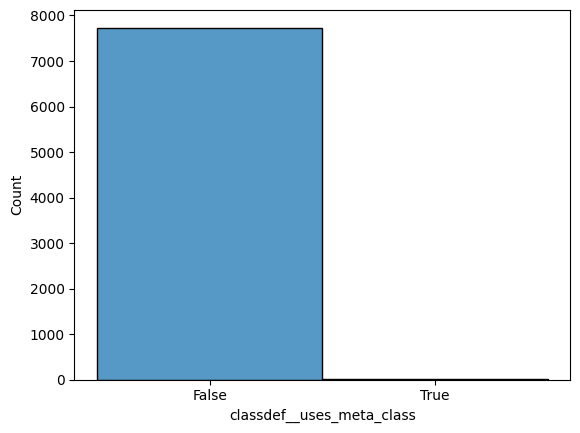

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['classdef__uses_meta_class'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['classdef__uses_meta_class'] == True])
num_false_values = len(X[X['classdef__uses_meta_class'] == False])
std = X['classdef__uses_meta_class'].std()
freq_true = len(X[X['classdef__uses_meta_class'] == True]) / len(X['classdef__uses_meta_class'])
freq_false = len(X[X['classdef__uses_meta_class'] == False]) / len(X['classdef__uses_meta_class'])
print(f'La variable uses_meta_class contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable uses_meta_class a False es {freq_false}.')

La variable uses_meta_class contiene 21 valores verdaderos y 7734 valores falsos. Y, la desviación típica es de 0.051970623433589935
La frecuencia con la que programa puede tener la variable uses_meta_class a True es 0.0027079303675048355.
La frecuencia con la que programa puede tener la variable uses_meta_class a False es 0.9972920696324952.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'classdef__uses_meta_class', possible_values)

La variable classdef__uses_meta_class contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable classdef__uses_meta_class toma el valor de 0.0 en un 99.73% de los items.
La variable classdef__uses_meta_class toma el valor de 1.0 en un 0.2708% de los items.


In [26]:
X[X['classdef__uses_meta_class'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,21.0,21.00000,21.0,21.000000,21.0,21.0,21.000000,21.000000,21.0,21.000000,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
mean,0.0,15.00000,0.0,6.571429,0.0,0.0,0.285714,6.857143,0.0,0.071429,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,0.0,3.24037,0.0,2.314550,0.0,0.0,0.462910,1.851640,0.0,0.115728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,13.00000,0.0,3.000000,0.0,0.0,0.000000,4.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,13.00000,0.0,3.000000,0.0,0.0,0.000000,4.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,13.00000,0.0,8.000000,0.0,0.0,0.000000,8.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.0,20.00000,0.0,8.000000,0.0,0.0,1.000000,8.000000,0.0,0.250000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,0.0,20.00000,0.0,8.000000,0.0,0.0,1.000000,8.000000,0.0,0.250000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Menos del 0,3% de las clases usan metaclass.

### Variable number_of_characters (5/23)
Esta variable representa el número de caracteres que tiene el nombre de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 35. Con una media de 13.1.

<Axes: ylabel='classdef__number_of_characters'>

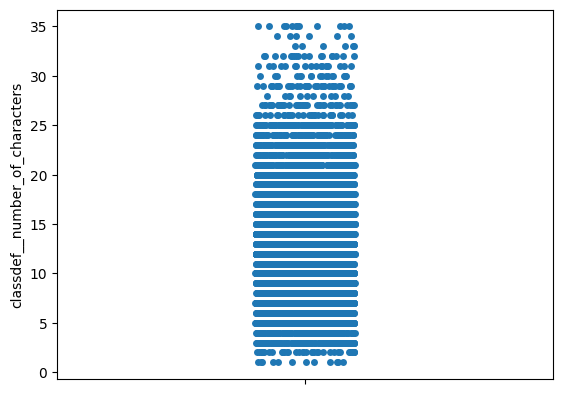

In [27]:
sns.stripplot(X['classdef__number_of_characters'])

In [28]:
print_outliers_for_df_column(X, 'classdef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4271872055227667
Rango valores atípicos extremos (Tukey): [-15.0,41.0]
Rango valores atípicos leves (Tukey): [-3.0,29.0]
Rango valores atípicos extremos (Fixed BoxPlot): [6.309434403435573,83.26457706806352]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -15.0 (Q1-3*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_characters inferior a -3.0 (Q1-1.5*IQR) para classdef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 78 instancias tienen un valor para classdef__number_of_characters superior a 29.0 (Q3+1.5*IQR) para classdef__number_of_characters. Representando un 1.006% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__number_of_characters superior a 41.0 (Q3-3*IQR) para classdef__number_of_characters. Representando un 0.0% del total

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 29.0 (Con un MC de 42 usamos Tuckey)

In [29]:
X[X['classdef__number_of_characters'] > 29.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,78.0,78.000000,78.0,78.000000,78.0,78.0,78.000000,78.000000,78.000000,78.000000,...,78.0,78.000000,78.0,78.0,78.000000,78.000000,78.0,78.000000,78.000000,78.0
mean,0.0,32.000000,0.0,1.551282,1.0,0.0,0.923077,2.615385,0.007835,0.747863,...,0.0,0.076923,0.0,0.0,0.020299,0.384615,0.0,0.538462,0.076923,0.0
std,0.0,1.720767,0.0,4.024753,0.0,0.0,0.268194,4.527637,0.027921,0.390246,...,0.0,0.268194,0.0,0.0,0.070795,0.489653,0.0,0.501745,0.268194,0.0
min,0.0,30.000000,0.0,0.000000,1.0,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.0,31.000000,0.0,0.000000,1.0,0.0,1.000000,1.000000,0.000000,0.333333,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.0,32.000000,0.0,0.000000,1.0,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0
75%,0.0,33.000000,0.0,1.000000,1.0,0.0,1.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.0
max,0.0,35.000000,0.0,16.000000,1.0,0.0,1.000000,18.000000,0.111111,1.000000,...,0.0,1.000000,0.0,0.0,0.266667,1.000000,0.0,1.000000,1.000000,0.0


### IMPORTANTE
Revisar las 12 clases con nombres de caracteres

### Variable number_of_decorators (6/23)
Esta variable representa el número de decoradores que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 1. Con una media de 0.001.

<Axes: ylabel='classdef__number_of_decorators'>

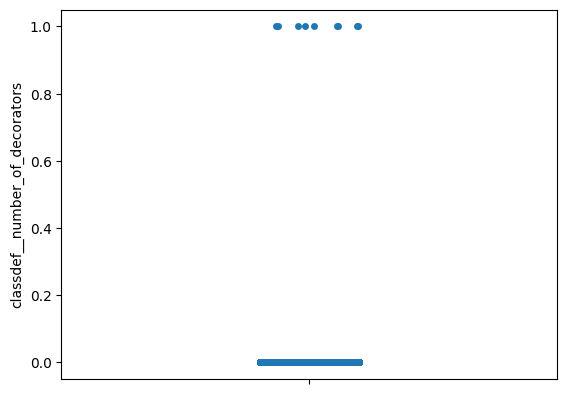

In [30]:
sns.stripplot(X['classdef__number_of_decorators'])

In [31]:
print_outliers_for_df_column(X, 'classdef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9823775756056102
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 9 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_decorators. Representando un 0.1161% del total de instancias.
+3.0IQR: 9 instancias tienen un valor para classdef__number_of_decorators superior a 0.0 (Q3-3*IQR) para classdef__number_of_decorators. Representando un 0.1161% del total de instancias.
L: 0 instancias tie

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [32]:
X[X['classdef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,9.0,9.000000,9.0,9.000000,9.0,9.0,9.0,9.0,9.000000,9.000000,...,9.0,9.000000,9.0,9.0,9.0,9.000000,9.0,9.0,9.000000,9.0
mean,0.0,6.444445,1.0,12.333333,1.0,0.0,1.0,16.0,0.121212,0.113636,...,0.0,0.039216,0.0,0.0,0.0,0.666667,0.0,0.0,0.333333,0.0
std,0.0,2.185813,0.0,7.000000,0.0,0.0,0.0,9.0,0.090909,0.102273,...,0.0,0.029412,0.0,0.0,0.0,0.500000,0.0,0.0,0.500000,0.0
min,0.0,5.000000,1.0,3.000000,1.0,0.0,1.0,4.0,0.000000,0.045455,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
25%,0.0,5.000000,1.0,3.000000,1.0,0.0,1.0,4.0,0.000000,0.045455,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
50%,0.0,5.000000,1.0,17.000000,1.0,0.0,1.0,22.0,0.181818,0.045455,...,0.0,0.058824,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0
75%,0.0,9.000000,1.0,17.000000,1.0,0.0,1.0,22.0,0.181818,0.250000,...,0.0,0.058824,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0
max,0.0,10.000000,1.0,17.000000,1.0,0.0,1.0,22.0,0.181818,0.250000,...,0.0,0.058824,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0


### IMPORTANTE
El 99,8% de las clases no tienen decoradores.

### Variable number_of_methods (7/23)
Esta variable representa el número de métodos en la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 73. Con una media de 4.6.

<Axes: ylabel='classdef__number_of_methods'>

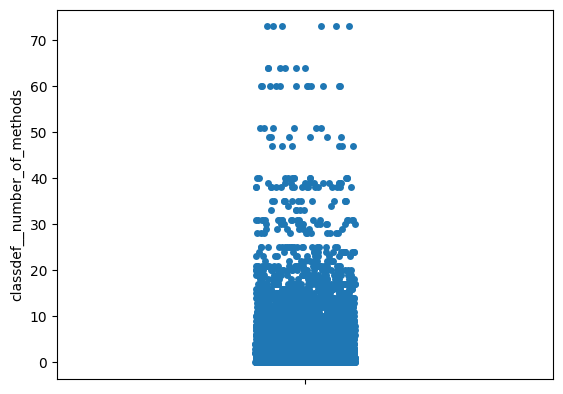

In [33]:
sns.stripplot(X['classdef__number_of_methods'])

In [34]:
print_outliers_for_df_column(X, 'classdef__number_of_methods')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6477823089282493
Rango valores atípicos extremos (Tukey): [-14.0,21.0]
Rango valores atípicos leves (Tukey): [-6.5,13.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.22301564247811734,106.0862441956543]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -14.0 (Q1-3*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_methods inferior a -6.5 (Q1-1.5*IQR) para classdef__number_of_methods. Representando un 0.0% del total de instancias.
+1.5IQR: 596 instancias tienen un valor para classdef__number_of_methods superior a 13.5 (Q3+1.5*IQR) para classdef__number_of_methods. Representando un 7.685% del total de instancias.
+3.0IQR: 214 instancias tienen un valor para classdef__number_of_methods superior a 21.0 (Q3-3*IQR) para classdef__number_of_methods. Representando un 2.76% del total de instancias.
L:

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 21 (Con un MC de 64 usamos Tuckey)

In [35]:
X[X['classdef__number_of_methods'] > 21].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,214.0,214.000000,214.0,214.000000,214.000000,214.0,214.000000,214.000000,214.000000,214.000000,...,214.0,214.000000,214.000000,214.0,214.000000,214.000000,214.000000,214.0,214.000000,214.0
mean,0.0,11.476636,0.0,35.691589,0.700935,0.0,0.897196,40.168224,0.072831,0.025799,...,0.0,0.030922,0.026578,0.0,0.105223,0.943925,0.028037,0.0,0.028037,0.0
std,0.0,3.629162,0.0,12.759907,0.568582,0.0,0.304414,14.843462,0.071193,0.012002,...,0.0,0.101496,0.041417,0.0,0.217858,0.230605,0.165467,0.0,0.165467,0.0
min,0.0,4.000000,0.0,22.000000,0.000000,0.0,0.000000,23.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,0.0,10.000000,0.0,25.000000,0.000000,0.0,1.000000,29.000000,0.023394,0.017340,...,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0
50%,0.0,12.000000,0.0,31.000000,1.000000,0.0,1.000000,36.000000,0.058824,0.027027,...,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0
75%,0.0,13.000000,0.0,39.750000,1.000000,0.0,1.000000,43.750000,0.100000,0.034483,...,0.0,0.022656,0.043247,0.0,0.122020,1.000000,0.000000,0.0,0.000000,0.0
max,0.0,20.000000,0.0,73.000000,2.000000,0.0,1.000000,74.000000,0.238095,0.071429,...,0.0,0.600000,0.161290,0.0,0.857143,1.000000,1.000000,0.0,1.000000,0.0


### IMPORTANTE
Hay que revisar los 6 que son mayores de 70

In [36]:
X[X['classdef__number_of_methods'] == 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1834.0,1834.000000,1834.0,1834.0,1834.000000,1834.0,1834.000000,1834.000000,1834.000000,1834.000000,...,1834.0,1834.0,1834.0,1834.0,1834.0,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,0.0,15.448746,0.0,0.0,1.052890,0.0,0.693566,2.051799,0.217929,0.522365,...,0.0,0.0,0.0,0.0,0.0,0.866412,0.018539,0.101963,0.009815,0.003272
std,0.0,6.491073,0.0,0.0,0.385123,0.0,0.461138,4.430963,0.386359,0.417522,...,0.0,0.0,0.0,0.0,0.0,0.340302,0.134926,0.302682,0.098608,0.057119
min,0.0,3.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,11.000000,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,15.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.000000,0.500000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,20.000000,0.0,0.0,1.000000,0.0,1.000000,2.000000,0.500000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,35.000000,0.0,0.0,3.000000,0.0,1.000000,71.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Casi 2000 clases sin métodos? 

### Variable number_of_base_classes (8/23)
Esta variable representa el número de base_classes que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 4. Con una media de 0.89.

<Axes: ylabel='classdef__number_of_base_classes'>

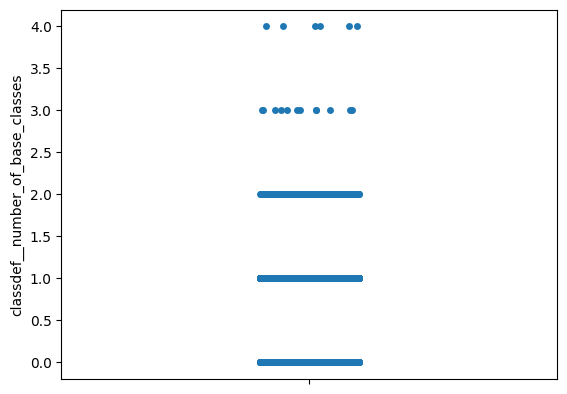

In [37]:
sns.stripplot(X['classdef__number_of_base_classes'])

In [38]:
print_outliers_for_df_column(X, 'classdef__number_of_base_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.25
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 1084 instancias tienen un valor para classdef__number_of_base_classes inferior a 1.0 (Q1-3*IQR) para classdef__number_of_base_classes. Representando un 13.98% del total de instancias.
-1.5IQR: 1084 instancias tienen un valor para classdef__number_of_base_classes inferior a 1.0 (Q1-1.5*IQR) para classdef__number_of_base_classes. Representando un 13.98% del total de instancias.
+1.5IQR: 283 instancias tienen un valor para classdef__number_of_base_classes superior a 1.0 (Q3+1.5*IQR) para classdef__number_of_base_classes. Representando un 3.649% del total de instancias.
+3.0IQR: 283 instancias tienen un valor para classdef__number_of_base_classes superior a 1.0 (Q3-3*IQR) para classdef__number_of_base_classes. Representando un 3.649% del total de instancias.
L: 10

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [39]:
X[X['classdef__number_of_base_classes'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,283.0,283.000000,283.0,283.000000,283.000000,283.0,283.000000,283.000000,283.000000,283.000000,...,283.0,283.0,283.000000,283.0,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.0,15.349823,0.0,3.392226,2.084806,0.0,0.660777,5.063604,0.077965,0.346182,...,0.0,0.0,0.006014,0.0,0.003855,0.830389,0.042403,0.035336,0.070671,0.021201
std,0.0,5.098452,0.0,6.437221,0.347048,0.0,0.474284,7.200979,0.179263,0.402639,...,0.0,0.0,0.023324,0.0,0.018351,0.375956,0.201863,0.184954,0.256729,0.144310
min,0.0,3.000000,0.0,0.000000,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,12.000000,0.0,0.000000,2.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,16.000000,0.0,0.000000,2.000000,0.0,1.000000,2.000000,0.000000,0.076923,...,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,18.000000,0.0,2.000000,2.000000,0.0,1.000000,4.000000,0.029412,0.500000,...,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,28.000000,0.0,28.000000,4.000000,0.0,1.000000,32.000000,1.000000,1.000000,...,0.0,0.0,0.125000,0.0,0.090909,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable average_stmts_method_body (9/23)
Esta variable representa el número medio de sentencias en los métodos de la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 28. Con una media de 2.5.

<Axes: ylabel='classdef__average_stmts_method_body'>

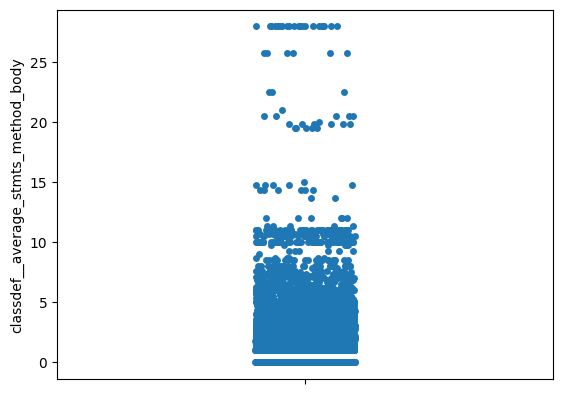

In [40]:
sns.stripplot(X['classdef__average_stmts_method_body'])

In [41]:
print_outliers_for_df_column(X, 'classdef__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6987756516596113
Rango valores atípicos extremos (Tukey): [-6.333333253860474,10.777777671813965]
Rango valores atípicos leves (Tukey): [-2.666666626930237,7.111111044883728]
Rango valores atípicos extremos (Fixed BoxPlot): [0.682231391571245,63.446905530991586]
-3.0IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -6.333333253860474 (Q1-3*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__average_stmts_method_body inferior a -2.666666626930237 (Q1-1.5*IQR) para classdef__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 366 instancias tienen un valor para classdef__average_stmts_method_body superior a 7.111111044883728 (Q3+1.5*IQR) para classdef__average_stmts_method_body. Representando un 4.72% del total de instancias.
+3.0IQR: 123 instancias tienen un valor para

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 10.7 (Con un MC de 69 usamos Tuckey)

In [42]:
X[X['classdef__average_stmts_method_body'] > 10.7].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,123.0,123.00000,123.0,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000,...,123.0,123.0,123.0,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.0
mean,0.0,11.95935,0.0,3.032520,0.829268,0.0,0.357724,7.747967,0.290337,0.077231,...,0.0,0.0,0.0,0.0,0.009033,0.504065,0.024390,0.333333,0.138211,0.0
std,0.0,4.21628,0.0,2.730925,0.377813,0.0,0.481291,7.216322,0.325185,0.109813,...,0.0,0.0,0.0,0.0,0.044064,0.502028,0.154888,0.473333,0.346533,0.0
min,0.0,4.00000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,10.00000,0.0,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,14.00000,0.0,2.000000,1.000000,0.0,0.000000,5.000000,0.200000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,14.00000,0.0,4.000000,1.000000,0.0,1.000000,14.000000,0.489511,0.171429,...,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,0.0,18.00000,0.0,9.000000,1.000000,0.0,1.000000,39.000000,0.857143,0.500000,...,0.0,0.0,0.0,0.0,0.222222,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
Hay 23 clases con una media de mas de 27 sentencias en el cuerpo de los métodos.

### Variable body_count (10/23)
Esta variable representa el número de sentencias que tiene la clase en el root. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 74. Con una media de 6.4.

<Axes: ylabel='classdef__body_count'>

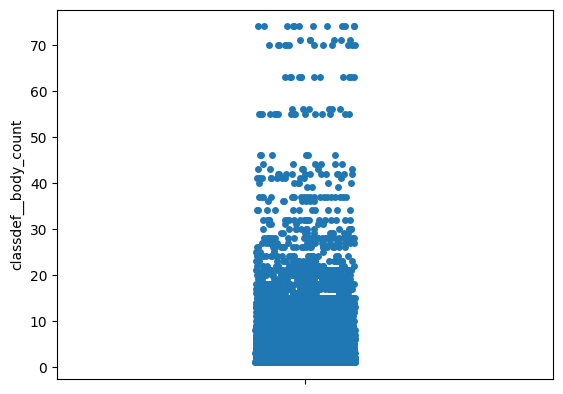

In [43]:
sns.stripplot(X['classdef__body_count'])

In [44]:
print_outliers_for_df_column(X, 'classdef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5520058796626068
Rango valores atípicos extremos (Tukey): [-16.0,26.0]
Rango valores atípicos leves (Tukey): [-7.0,17.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.6963030991121943,89.87945428746706]
-3.0IQR: 0 instancias tienen un valor para classdef__body_count inferior a -16.0 (Q1-3*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__body_count inferior a -7.0 (Q1-1.5*IQR) para classdef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 553 instancias tienen un valor para classdef__body_count superior a 17.0 (Q3+1.5*IQR) para classdef__body_count. Representando un 7.131% del total de instancias.
+3.0IQR: 247 instancias tienen un valor para classdef__body_count superior a 26.0 (Q3-3*IQR) para classdef__body_count. Representando un 3.185% del total de instancias.
L: 0 instancias tienen un valor para classdef__body_count 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 26.0 (Con un MC de 55 usamos Tuclkey Extremo)

In [45]:
X[X['classdef__body_count'] > 70].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,18.0,18.0,18.0,18.000000,18.0,18.0,18.0,18.000000,18.000000,18.000000,...,18.0,18.000000,18.000000,18.0,18.0,18.0,18.0,18.0,18.0,18.0
mean,0.0,13.0,0.0,45.666668,1.0,0.0,1.0,73.000000,0.360170,0.013704,...,0.0,0.005208,0.020833,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,33.441784,0.0,0.0,0.0,1.455214,0.457028,0.000277,...,0.0,0.007579,0.030317,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,13.0,0.0,0.000000,1.0,0.0,1.0,71.000000,0.000000,0.013514,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,13.0,0.0,0.000000,1.0,0.0,1.0,71.000000,0.000000,0.013514,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,13.0,0.0,64.000000,1.0,0.0,1.0,74.000000,0.094595,0.013514,...,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.0,13.0,0.0,73.000000,1.0,0.0,1.0,74.000000,0.985915,0.014085,...,0.0,0.015625,0.062500,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,0.0,13.0,0.0,73.000000,1.0,0.0,1.0,74.000000,0.985915,0.014085,...,0.0,0.015625,0.062500,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Hay 18 clases con mas de 70 sentencias en el body.  

### Variable number_of_keywords (11/23)
Esta variable representa el número de keywords diferentes de metaclass que tiene la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. 

<Axes: ylabel='classdef__number_of_keywords'>

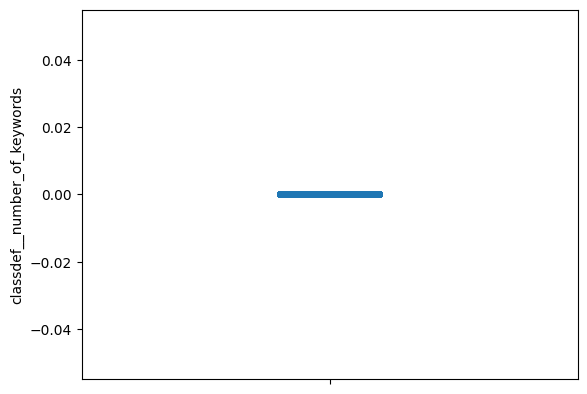

In [46]:
sns.stripplot(X['classdef__number_of_keywords'])

In [47]:
print_outliers_for_df_column(X, 'classdef__number_of_keywords')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-3*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__number_of_keywords inferior a 0.0 (Q1-1.5*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3+1.5*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__number_of_keywords superior a 0.0 (Q3-3*IQR) para classdef__number_of_keywords. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para classdef__number_of

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [48]:
X[X['classdef__number_of_keywords'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ninguna clase con keywords.

### Variable height (12/23)
Esta variable representa la distancia a la raiz del modulo en la que se encuentra la clase. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 5. Con una media de 1.13.

<Axes: ylabel='classdef__height'>

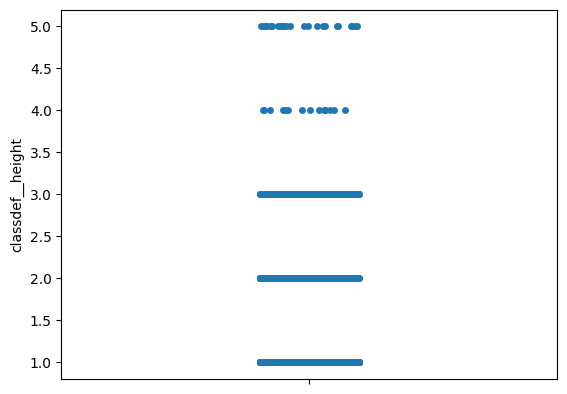

In [49]:
sns.stripplot(X['classdef__height'])

In [50]:
print_outliers_for_df_column(X, 'classdef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-3*IQR) para classdef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__height inferior a 1.0 (Q1-1.5*IQR) para classdef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 777 instancias tienen un valor para classdef__height superior a 1.0 (Q3+1.5*IQR) para classdef__height. Representando un 10.02% del total de instancias.
+3.0IQR: 777 instancias tienen un valor para classdef__height superior a 1.0 (Q3-3*IQR) para classdef__height. Representando un 10.02% del total de instancias.
L: 0 instancias tienen un valor para classdef__height inferior a 1.0 para classdef__height. Representando un 0.0% del total de instancias.
U: 77

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1 (Todos los umbrales son 1)

In [51]:
X[X['classdef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,777.0,777.000000,777.0,777.000000,777.000000,777.0,777.000000,777.000000,777.000000,777.000000,...,777.0,777.000000,777.000000,777.0,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.0,11.603603,0.0,3.683398,0.981982,0.0,0.274131,5.368083,0.245958,0.119725,...,0.0,0.008460,0.004290,0.0,0.000429,0.749035,0.027027,0.148005,0.021879,0.054054
std,0.0,5.126984,0.0,6.194872,0.328515,0.0,0.446363,7.254818,0.315835,0.235921,...,0.0,0.061891,0.053341,0.0,0.004866,0.433848,0.162267,0.355334,0.146383,0.226270
min,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,8.000000,0.0,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,11.000000,0.0,1.000000,1.000000,0.0,0.000000,2.000000,0.089286,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,15.000000,0.0,5.000000,1.000000,0.0,1.000000,8.000000,0.454545,0.090909,...,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,26.000000,0.0,51.000000,3.000000,0.0,1.000000,56.000000,1.000000,1.000000,...,0.0,0.500000,0.666667,0.0,0.055556,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
Hay que revisar los que tiene profundidad 5. 

### Variable assignments_pct (13/23)
Esta variable representa la proporción de las sentencias en el root de la clase que son asignaciones. Toma los valores de 0.0 - 1.0. La media es 0.12.

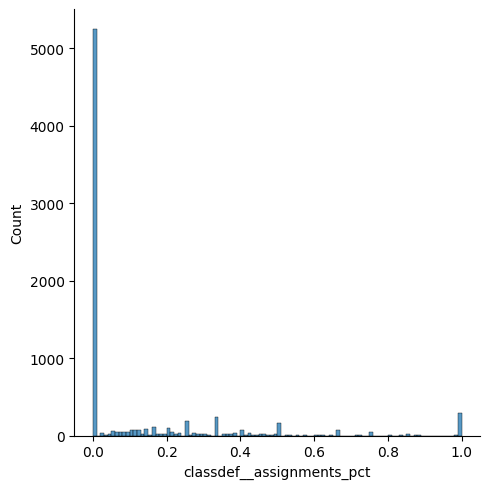

In [52]:
sns.displot(X['classdef__assignments_pct'], bins=[i / 100 for i in range(0, 101)])

In [53]:
print_outliers_for_df_column(X, 'classdef__assignments_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7340222224593163
Rango valores atípicos extremos (Tukey): [-0.4285714477300644,0.5714285969734192]
Rango valores atípicos leves (Tukey): [-0.2142857238650322,0.357142873108387]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.016415606597613295,4.180430652780896]
-3.0IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.4285714477300644 (Q1-3*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__assignments_pct inferior a -0.2142857238650322 (Q1-1.5*IQR) para classdef__assignments_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 964 instancias tienen un valor para classdef__assignments_pct superior a 0.357142873108387 (Q3+1.5*IQR) para classdef__assignments_pct. Representando un 12.43% del total de instancias.
+3.0IQR: 508 instancias tienen un valor para classdef__assignments_pct superior a 0.571428596973

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.57 (Con un MC de 73 usamos Tuckey)

In [54]:
X[X['classdef__assignments_pct'] > 0.57].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,518.0,518.000000,518.0,518.000000,518.000000,518.0,518.000000,518.000000,518.000000,518.000000,...,518.0,518.000000,518.0,518.0,518.000000,518.000000,518.000000,518.000000,518.000000,518.0
mean,0.0,12.314672,0.0,0.631274,0.926641,0.0,0.227799,6.193050,0.883618,0.043954,...,0.0,0.023166,0.0,0.0,0.003861,0.708494,0.071429,0.198842,0.021236,0.0
std,0.0,5.296565,0.0,1.509847,0.371135,0.0,0.419818,8.948671,0.147083,0.093416,...,0.0,0.150576,0.0,0.0,0.035701,0.454895,0.257788,0.399514,0.144308,0.0
min,0.0,3.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.571429,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,9.000000,0.0,0.000000,1.000000,0.0,0.000000,2.000000,0.750000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,12.000000,0.0,0.000000,1.000000,0.0,0.000000,3.000000,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,15.000000,0.0,1.000000,1.000000,0.0,0.000000,8.000000,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,0.0,27.000000,0.0,9.000000,3.000000,0.0,1.000000,71.000000,1.000000,0.333333,...,0.0,1.000000,0.0,0.0,0.333333,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
El 67% de las clases no tienen asignaciones en el root.

### Variable expressions_pct (14/23)
Esta variable representa la proporción de las sentencias en root de la clase que son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.22.

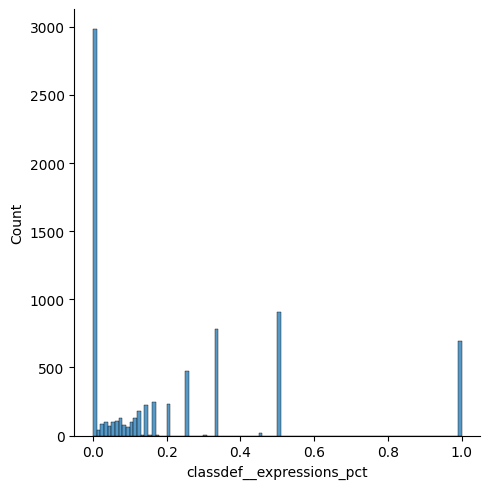

In [55]:
sns.displot(X['classdef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [56]:
print_outliers_for_df_column(X, 'classdef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4167089453604509
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.11629462240515738,2.9810261735145063]
-3.0IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -1.0000000298023224 (Q1-3*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__expressions_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para classdef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 691 instancias tienen un valor para classdef__expressions_pct superior a 0.833333358168602 (Q3+1.5*IQR) para classdef__expressions_pct. Representando un 8.91% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__expressions_pct superior a 1.333333373069763

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.83 (Con un MC de 41 usamos Tuckey)

In [57]:
X[X['classdef__expressions_pct'] > 0.833].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,691.0,691.000000,691.0,691.0,691.000000,691.0,691.0,691.0,691.0,691.0,...,691.0,691.0,691.0,691.0,691.0,691.000000,691.000000,691.000000,691.0,691.0
mean,0.0,18.069464,0.0,0.0,1.096961,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.862518,0.008683,0.128799,0.0,0.0
std,0.0,6.826066,0.0,0.0,0.296119,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.344605,0.092845,0.335220,0.0,0.0
min,0.0,3.000000,0.0,0.0,1.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,13.000000,0.0,0.0,1.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0
50%,0.0,18.000000,0.0,0.0,1.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0
75%,0.0,21.000000,0.0,0.0,1.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.0
max,0.0,35.000000,0.0,0.0,2.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0


### IMPORTANTE
El 61% de las clases no tienen expresiones en el root.

### Variable type_annotations_pct (15/23)
Esta variable representa la proporción de parámetros y returns con anotacion de tipo en la clase. Esta variable toma valores de 0.0 - 0.85. Su media es 0.06. 

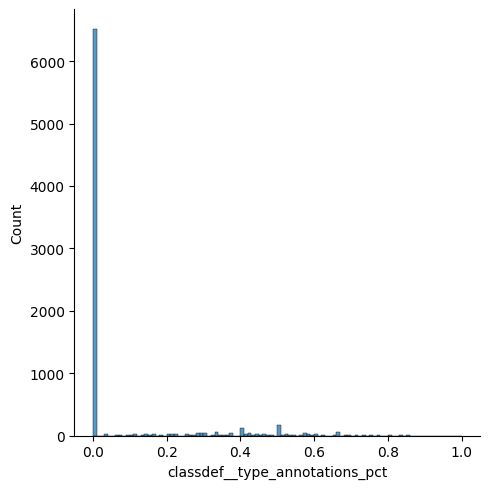

In [58]:
sns.displot(X['classdef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [59]:
print_outliers_for_df_column(X, 'classdef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.762953144862595
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a 0.0 (Q1-3*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__type_annotations_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1244 instancias tienen un valor para classdef__type_annotations_pct superior a 0.0 (Q3+1.5*IQR) para classdef__type_annotations_pct. Representando un 16.04% del total de instancias.
+3.0IQR: 1244 instancias tienen un valor para classdef__type_annotations_pct superior a 0.0 (Q3-3*IQR) para classdef__type_annotations_pct. Representando un 16.04% del total de instancias.
L: 0 instancias 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [60]:
X[X['classdef__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1244.0,1244.000000,1244.0,1244.000000,1244.000000,1244.0,1244.000000,1244.000000,1244.000000,1244.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.0,1244.000000,1244.000000,1244.0
mean,0.0,14.168810,0.0,5.656753,0.615756,0.0,0.536977,6.857717,0.074079,0.128398,...,0.001608,0.031653,0.005616,0.002255,0.085751,0.815916,0.0,0.067524,0.116559,0.0
std,0.0,5.680311,0.0,5.308688,0.510809,0.0,0.498831,5.691578,0.146058,0.151466,...,0.025318,0.107498,0.030329,0.029311,0.197803,0.387708,0.0,0.251028,0.321024,0.0
min,0.0,3.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.0,10.000000,0.0,2.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0
50%,0.0,13.000000,0.0,4.000000,1.000000,0.0,1.000000,5.000000,0.000000,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0
75%,0.0,18.000000,0.0,8.000000,1.000000,0.0,1.000000,9.000000,0.111111,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0
max,0.0,34.000000,0.0,33.000000,2.000000,0.0,1.000000,34.000000,0.857143,0.500000,...,0.400000,0.600000,0.285714,0.450000,0.900000,1.000000,0.0,1.000000,1.000000,0.0


### IMPORTANTE
El 83% de las clases no tienen anotaciones de tipo.

### Variable private_methods_pct (16/23)
Esta variable representa la proporción de métodos que son privados en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.06

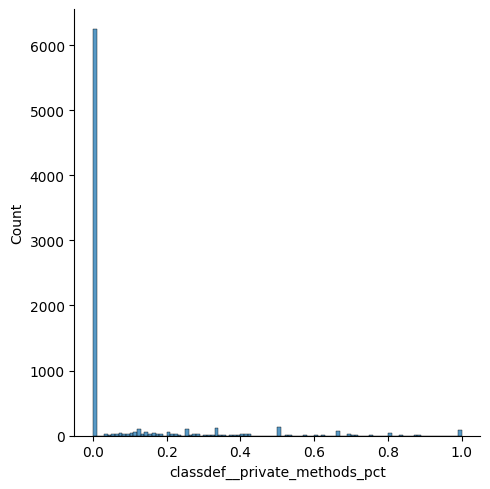

In [61]:
sns.displot(X['classdef__private_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [62]:
print_outliers_for_df_column(X, 'classdef__private_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7763758710926978
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__private_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__private_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1512 instancias tienen un valor para classdef__private_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__private_methods_pct. Representando un 19.5% del total de instancias.
+3.0IQR: 1512 instancias tienen un valor para classdef__private_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__private_methods_pct. Representando un 19.5% del total de instancias.
L: 0 instancias tienen un

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [63]:
X[X['classdef__private_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1512.0,1512.000000,1512.000000,1512.000000,1512.000000,1512.0,1512.000000,1512.000000,1512.000000,1512.000000,...,1512.0,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.0
mean,0.0,12.962963,0.003968,11.788360,0.804894,0.0,0.664683,14.242724,0.108444,0.069195,...,0.0,0.052787,0.029153,0.001488,0.048001,0.863095,0.042328,0.037037,0.057540,0.0
std,0.0,4.879211,0.062890,10.688238,0.469763,0.0,0.472258,12.288823,0.142051,0.076425,...,0.0,0.154576,0.096146,0.025843,0.141140,0.343861,0.201403,0.188915,0.232948,0.0
min,0.0,2.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,10.000000,0.000000,5.000000,1.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,12.000000,0.000000,9.000000,1.000000,0.0,1.000000,11.000000,0.051316,0.050000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,16.000000,0.000000,15.000000,1.000000,0.0,1.000000,18.000000,0.190476,0.111111,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,0.0,34.000000,1.000000,64.000000,2.000000,0.0,1.000000,74.000000,0.800000,0.333333,...,0.0,1.000000,1.000000,0.450000,0.900000,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
El 80% de las clases no tienen métodos privados. Y hay cerca de un 1% de las clases tienen todos los métodos privados. Para que? Mal uso del POO?

### Variable magic_methods_pct (17/23)
Esta variable representa la proporción de métodos que son magic en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.31

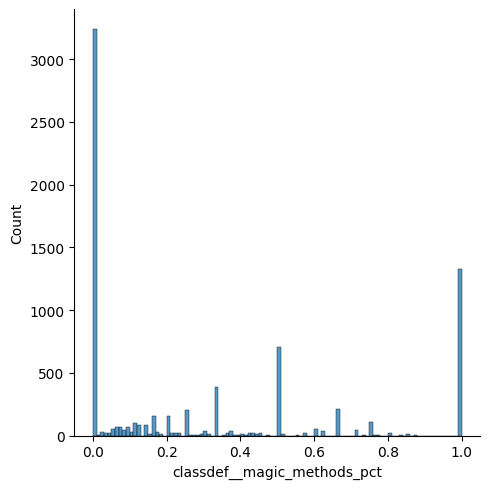

In [64]:
sns.displot(X['classdef__magic_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [65]:
print_outliers_for_df_column(X, 'classdef__magic_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.305825412273407
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.25715634945968513,3.048792140706265]
-3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -1.5 (Q1-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct inferior a -0.75 (Q1-1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 1.25 (Q3+1.5*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para classdef__magic_methods_pct superior a 2.0 (Q3-3*IQR) para classdef__magic_methods_pct. Representando un 0.0% del total de instancias.
L: 0 instan

In [66]:
X[X['classdef__magic_methods_pct'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,1328.0,1328.000000,1328.000000,1328.000000,1328.000000,1328.0,1328.000000,1328.000000,1328.000000,1328.000000,...,1328.0,1328.000000,1328.0,1328.0,1328.0,1328.000000,1328.000000,1328.000000,1328.000000,1328.00000
mean,0.0,13.360693,0.002259,1.863705,0.813253,0.0,0.588855,2.951807,0.060955,0.222598,...,0.0,0.004518,0.0,0.0,0.0,0.628765,0.015060,0.176958,0.156627,0.02259
std,0.0,5.744643,0.047493,1.614350,0.423221,0.0,0.492227,2.466798,0.176611,0.207169,...,0.0,0.047332,0.0,0.0,0.0,0.483317,0.121838,0.381777,0.363585,0.14865
min,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.0,9.000000,0.000000,1.000000,1.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.0,12.000000,0.000000,1.000000,1.000000,0.0,1.000000,2.000000,0.000000,0.250000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.00000
75%,0.0,17.000000,0.000000,2.000000,1.000000,0.0,1.000000,3.000000,0.000000,0.500000,...,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.00000
max,0.0,33.000000,1.000000,9.000000,2.000000,0.0,1.000000,14.000000,0.857143,0.500000,...,0.0,0.500000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.00000


### IMPORTANTE
El 41% de las clases no tienen métodos magic. Y un 17% de las clases tienen todos los métodos magic.

### Variable async_methods_pct (18/23)
Esta variable representa la proporción de métodos que son asincronos en la clase. Esta variable toma valores de 0.0 - 0.4. Su media es 0.0003

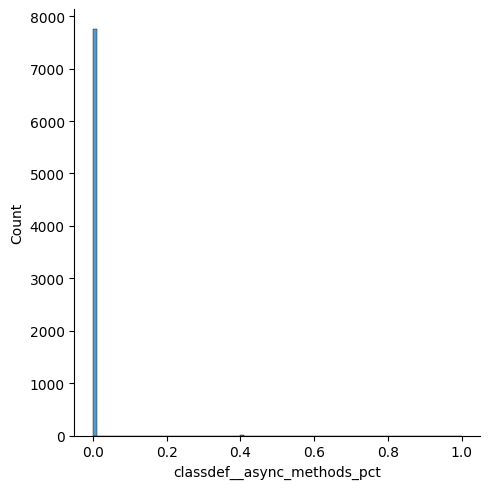

In [67]:
sns.displot(X['classdef__async_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [68]:
print_outliers_for_df_column(X, 'classdef__async_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9857009851833063
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__async_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__async_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 6 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__async_methods_pct. Representando un 0.07737% del total de instancias.
+3.0IQR: 6 instancias tienen un valor para classdef__async_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__async_methods_pct. Representando un 0.07737% del total de instancias.
L: 0 instancias tienen un valor para clas

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [69]:
X[X['classdef__async_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
mean,0.0,13.0,0.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,13.0,0.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,13.0,0.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,13.0,0.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.0,13.0,0.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,0.0,13.0,0.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Solamente 6 clases tienen algun métodos asincronos.

### Variable class_methods_pct (19/23)
Esta variable representa la proporción de métodos que son de clase en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.016

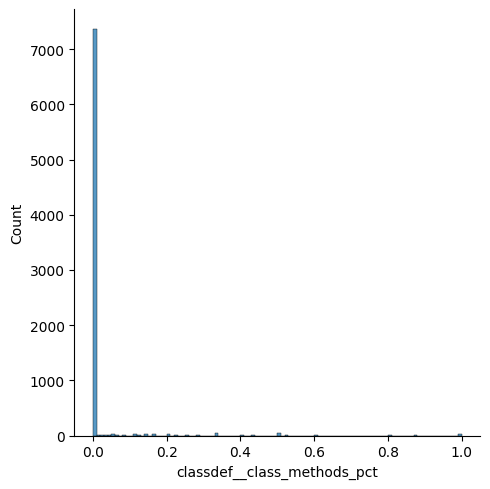

In [70]:
sns.displot(X['classdef__class_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [71]:
print_outliers_for_df_column(X, 'classdef__class_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9027043631526043
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__class_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__class_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 396 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__class_methods_pct. Representando un 5.106% del total de instancias.
+3.0IQR: 396 instancias tienen un valor para classdef__class_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__class_methods_pct. Representando un 5.106% del total de instancias.
L: 0 instancias tienen un valor para clas

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [72]:
X[X['classdef__class_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,396.0,396.000000,396.000000,396.000000,396.000000,396.0,396.000000,396.000000,396.000000,396.000000,...,396.0,396.000000,396.000000,396.0,396.000000,396.000000,396.000000,396.000000,396.000000,396.0
mean,0.0,12.570707,0.015152,11.618687,0.654040,0.0,0.638889,13.853536,0.113462,0.073808,...,0.0,0.330955,0.039252,0.0,0.043152,0.926768,0.030303,0.012626,0.030303,0.0
std,0.0,4.663084,0.122310,12.145471,0.476282,0.0,0.480930,13.745933,0.148471,0.086532,...,0.0,0.270859,0.088992,0.0,0.117844,0.260847,0.171637,0.111796,0.171637,0.0
min,0.0,3.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.015625,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,10.000000,0.000000,4.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,...,0.0,0.125000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,12.000000,0.000000,7.000000,1.000000,0.0,1.000000,8.000000,0.068182,0.043478,...,0.0,0.250000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,15.000000,0.000000,17.000000,1.000000,0.0,1.000000,18.000000,0.181818,0.136364,...,0.0,0.500000,0.026316,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,0.0,31.000000,1.000000,64.000000,1.000000,0.0,1.000000,74.000000,0.666667,0.333333,...,0.0,1.000000,0.500000,0.0,0.800000,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
Menos del 6% de las clases tienen algún método de clase.

### Variable static_methods_pct (20/23)
Esta variable representa la proporción de métodos que son estaticos en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.012.

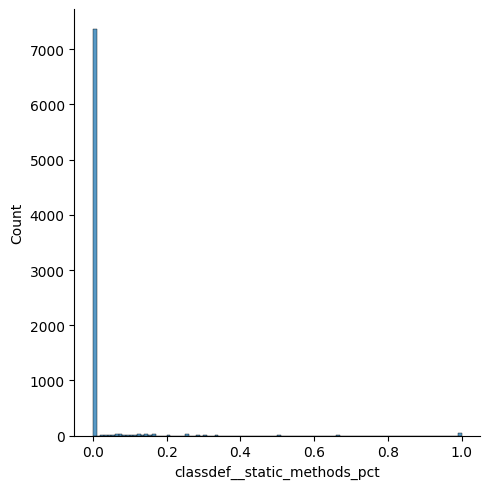

In [73]:
sns.displot(X['classdef__static_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [74]:
print_outliers_for_df_column(X, 'classdef__static_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9186304006271674
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__static_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__static_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 394 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__static_methods_pct. Representando un 5.081% del total de instancias.
+3.0IQR: 394 instancias tienen un valor para classdef__static_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__static_methods_pct. Representando un 5.081% del total de instancias.
L: 0 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [75]:
X[X['classdef__static_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,394.0,394.000000,394.0,394.000000,394.00000,394.0,394.000000,394.000000,394.000000,394.000000,...,394.0,394.000000,394.000000,394.0,394.000000,394.000000,394.000000,394.000000,394.000000,394.0
mean,0.0,11.769035,0.0,15.058375,0.69797,0.0,0.695431,20.210659,0.120321,0.089949,...,0.0,0.103118,0.249552,0.0,0.029092,0.761421,0.076142,0.012690,0.149746,0.0
std,0.0,4.136962,0.0,14.715076,0.55501,0.0,0.460810,18.242327,0.131937,0.127098,...,0.0,0.219996,0.285633,0.0,0.101810,0.426757,0.265563,0.112077,0.357276,0.0
min,0.0,3.000000,0.0,1.000000,0.00000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.026316,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,9.000000,0.0,6.000000,0.00000,0.0,0.000000,7.000000,0.000000,0.000000,...,0.0,0.000000,0.076923,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,12.000000,0.0,9.000000,1.00000,0.0,1.000000,13.000000,0.100000,0.041667,...,0.0,0.000000,0.142857,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,14.000000,0.0,20.000000,1.00000,0.0,1.000000,26.000000,0.181818,0.111111,...,0.0,0.015625,0.250000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,0.0,21.000000,0.0,64.000000,2.00000,0.0,1.000000,74.000000,0.490909,0.500000,...,0.0,0.875000,1.000000,0.0,0.827586,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
El 95% de las clases no tienen métodos estáticos.

### Variable abstract_methods_pct (21/23)
Esta variable representa la proporción de métodos que son abstractos en la clase. Esta variable toma valores de 0.0 - 0.45. Su media es 0.0003

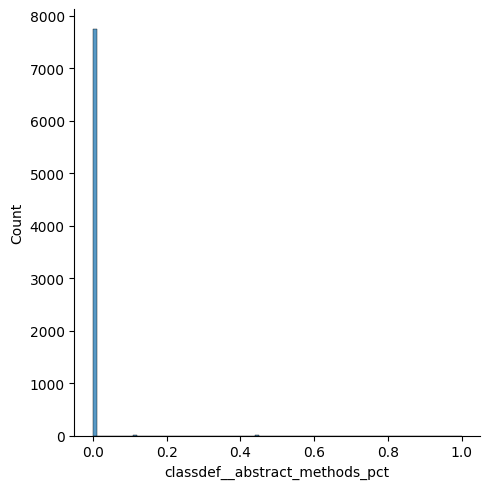

In [76]:
sns.displot(X['classdef__abstract_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [77]:
print_outliers_for_df_column(X, 'classdef__abstract_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9837333831191772
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__abstract_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__abstract_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 11 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__abstract_methods_pct. Representando un 0.1418% del total de instancias.
+3.0IQR: 11 instancias tienen un valor para classdef__abstract_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__abstract_methods_pct. Representando un 0.1418% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [78]:
X[X['classdef__abstract_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,11.0,11.000000,11.0,11.000000,11.0,11.0,11.000000,11.000000,11.000000,11.000000,...,11.0,11.0,11.0,11.000000,11.000000,11.0,11.0,11.0,11.0,11.0
mean,0.0,13.363636,0.0,14.090909,1.0,0.0,0.454545,14.636364,0.008264,0.021645,...,0.0,0.0,0.0,0.264141,0.468687,1.0,0.0,0.0,0.0,0.0
std,0.0,1.566699,0.0,5.664884,0.0,0.0,0.522233,6.120012,0.027410,0.024868,...,0.0,0.0,0.0,0.177975,0.412963,0.0,0.0,0.0,0.0,0.0
min,0.0,12.000000,0.0,9.000000,1.0,0.0,0.000000,9.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.100000,0.100000,1.0,0.0,0.0,0.0,0.0
25%,0.0,12.000000,0.0,9.000000,1.0,0.0,0.000000,9.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.111111,0.111111,1.0,0.0,0.0,0.0,0.0
50%,0.0,12.000000,0.0,10.000000,1.0,0.0,0.000000,11.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.111111,0.111111,1.0,0.0,0.0,0.0,0.0
75%,0.0,15.000000,0.0,20.000000,1.0,0.0,1.000000,21.000000,0.000000,0.047619,...,0.0,0.0,0.0,0.450000,0.900000,1.0,0.0,0.0,0.0,0.0
max,0.0,15.000000,0.0,20.000000,1.0,0.0,1.000000,21.000000,0.090909,0.047619,...,0.0,0.0,0.0,0.450000,0.900000,1.0,0.0,0.0,0.0,0.0


### IMPORTANTE
Apenas un 0,2% de las clases tienen algún método abstracto.

### Variable property_methods_pct (22/23)
Esta variable representa la proporción de métodos que son property en la clase. Esta variable toma valores de 0.0 - 1.0. Su media es 0.032

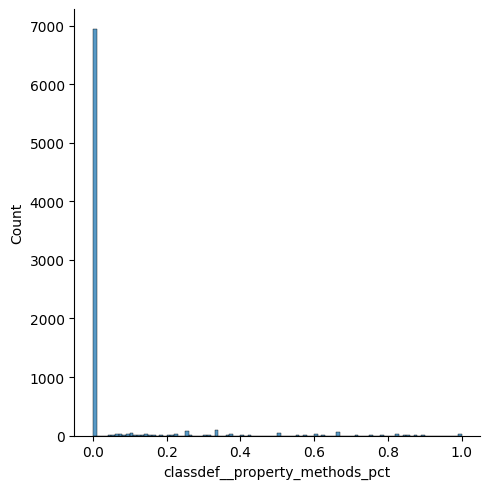

In [79]:
sns.displot(X['classdef__property_methods_pct'], bins=[i / 100 for i in range(0, 101)])

In [80]:
print_outliers_for_df_column(X, 'classdef__property_methods_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8437048559489528
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-3*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para classdef__property_methods_pct inferior a 0.0 (Q1-1.5*IQR) para classdef__property_methods_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 816 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3+1.5*IQR) para classdef__property_methods_pct. Representando un 10.52% del total de instancias.
+3.0IQR: 816 instancias tienen un valor para classdef__property_methods_pct superior a 0.0 (Q3-3*IQR) para classdef__property_methods_pct. Representando un 10.52% del total de instancias.
L: 0 instancias t

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [81]:
X[X['classdef__property_methods_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,classdef__expressions_pct,...,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__name_convention_CamelUp,classdef__name_convention_Lower,classdef__name_convention_NoNameConvention,classdef__name_convention_SnakeCase,classdef__name_convention_Upper
count,816.0,816.000000,816.0,816.000000,816.000000,816.0,816.000000,816.000000,816.000000,816.000000,...,816.0,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.0
mean,0.0,13.074755,0.0,10.302696,0.776961,0.0,0.531863,12.014706,0.082463,0.059221,...,0.0,0.017042,0.012088,0.003561,0.366406,0.900735,0.007353,0.066176,0.025735,0.0
std,0.0,5.674011,0.0,7.152350,0.450503,0.0,0.499290,8.004433,0.124641,0.073709,...,0.0,0.074549,0.068089,0.036299,0.260854,0.299200,0.085486,0.248743,0.158442,0.0
min,0.0,3.000000,0.0,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,9.000000,0.0,5.000000,1.000000,0.0,0.000000,6.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.154135,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,12.000000,0.0,9.000000,1.000000,0.0,1.000000,10.000000,0.000000,0.034483,...,0.0,0.000000,0.000000,0.000000,0.318182,1.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,16.000000,0.0,14.000000,1.000000,0.0,1.000000,15.000000,0.133333,0.111111,...,0.0,0.000000,0.000000,0.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.0
max,0.0,34.000000,0.0,38.000000,2.000000,0.0,1.000000,41.000000,0.608696,0.333333,...,0.0,0.529412,0.666667,0.450000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
El 90% de las clases no tienen métodos property.

### Variable name_convention (23/23)
Esta variable es de tipo categórica y representa la name_convention del nombre de la clase.

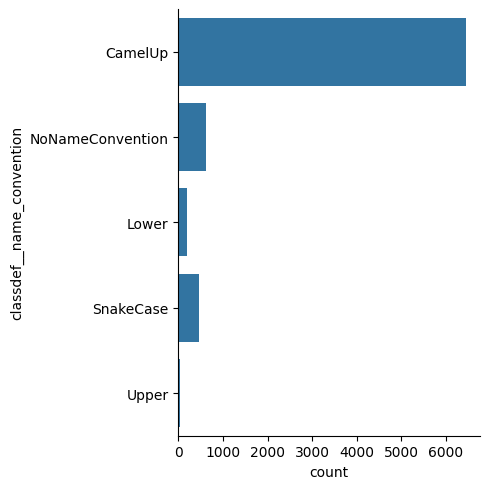

In [82]:
sns.catplot(full_table['classdef__name_convention'], kind="count")

In [83]:
print_frequency_anal_for_cat_var(full_table, 'classdef__name_convention')

La variable classdef__name_convention contiene 5 valores distintos.
El umbral de outlier es de 0.04%
La variable classdef__name_convention toma el valor de CamelUp en un 83.15% de los items.
La variable classdef__name_convention toma el valor de NoNameConvention en un 8.098% de los items.
La variable classdef__name_convention toma el valor de SnakeCase en un 5.816% de los items.
La variable classdef__name_convention toma el valor de Lower en un 2.398% de los items.
La variable classdef__name_convention toma el valor de Upper en un 0.5416% de los items.


In [84]:
print_values_usage_for_cat_var(full_table, 'classdef__name_convention', NAMING_CONVENTION_VALUES)

La variable classdef__name_convention puede tomar 7 valores distintos
	5 (71.43%) valores utilizados
	2 (28.57%) valores NO utilizados
		La variable classdef__name_convention nunca toma valor Discard.
		La variable classdef__name_convention nunca toma valor CamelLow.


### IMPORTANTE
Mas de un 17% no sigue el convenio de nombrado de clases de Python

## Multivariate

TODO: isolation forest algorithm

In [85]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,classdef__name_convention,classdef__is_enum_class,classdef__number_of_characters,classdef__number_of_decorators,classdef__number_of_methods,classdef__number_of_base_classes,classdef__has_generic_type_annotations,classdef__has_doc_string,classdef__body_count,classdef__assignments_pct,...,classdef__average_stmts_method_body,classdef__type_annotations_pct,classdef__private_methods_pct,classdef__magic_methods_pct,classdef__async_methods_pct,classdef__class_methods_pct,classdef__static_methods_pct,classdef__abstract_methods_pct,classdef__property_methods_pct,classdef__expertise_level
812,Lower,False,4,0,9,0,False,False,39,0.666667,...,22.555555,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,BEGINNER
1332,Lower,False,4,0,9,0,False,False,39,0.666667,...,22.555555,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,BEGINNER
1359,Lower,False,4,0,9,0,False,False,39,0.666667,...,22.555555,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,BEGINNER


### IMPORTANTE
No hay ningun outlier detectado por el algoritmo de Isolation Forest.